In [1]:
import os
import glob
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.models.feature_extraction import get_graph_node_names
from torchvision.models.feature_extraction import create_feature_extractor
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.nn.functional as F



from FileReader import get_picture_tensors
from ModelEvaluation import eval_model

from CatNet.datasets import OrderedDataSet, SiameseDataset
from CatNet.models import CatNet, Autoencoder
from CatNet.losses import ContrastiveLoss


In [24]:
n_classes = 32

# classifieur = nn.Sequential(
#     nn.Dropout(p=0.5, inplace=False),
#     nn.Linear(512, 128),
#     # nn.BatchNorm1d(128),
#     # nn.ReLU(inplace=True)
# )



# classifieur = nn.Sequential(
#     # nn.Dropout(p=0.5, inplace=False),
#     nn.Linear(512, 128),
#     nn.ReLU(inplace=True),
#     # nn.BatchNorm1d(128),
#     nn.Linear(128, 128),
#     nn.ReLU(inplace=True),
# )

# classifieur = nn.Sequential(
#     # nn.Dropout(p=0.5, inplace=False),
#     nn.MaxPool1d(kernel_size = 2, stride = 2),
#     nn.Linear(256, 256),
#     nn.ReLU(inplace=True),
#     # nn.MaxPool1d(kernel_size = 2, stride = 2),
#     nn.Linear(256, 128),
#     nn.ReLU(inplace=True),
#     # # nn.BatchNorm1d(128),
#     # nn.Linear(128, 128),
#     # nn.ReLU(inplace=True),
# )


# classifieur = nn.Sequential(
#     nn.Dropout(p=0.5, inplace=False),
#     nn.Linear(512, 512),
#     # nn.ReLU(inplace=True),
# #     # nn.Sigmoid(),
# #     nn.Tanh(),
# #     # nn.BatchNorm1d(512),
# #     nn.Linear(512, 128),
# #     nn.ReLU(inplace=True),
# # )

# classifieur = nn.Sequential(
#     nn.Dropout(p=0.5),
#     nn.Linear(9216, 4096),
#     nn.ReLU(inplace=True),
#     nn.Dropout(p=0.5),
#     nn.Linear(4096, 1024),
#     nn.ReLU(inplace=True),
#     nn.Linear(1024, 128),
# )


# based_model = CatNet(cnn_backbone = 'alexnet', classifier = classifieur)
# # based_model = CatNet(cnn_backbone = 'resnet18')#, classifier = classifieur)
# # based_model = CatNet(cnn_backbone = 'vgg19')#, classifier = classifieur)
# # based_model.load_parameters_from_file('resnet_512_to_128.pth')

# # based_model.summary()


classifieur = nn.Sequential(
    # nn.Dropout(p=0.5),
    # nn.Linear(9216, 4096),
    nn.Linear(9216, 1024),
    nn.ReLU(inplace=True),
    # nn.Dropout(p=0.5),
    # nn.Linear(4096, 1024),
    # nn.ReLU(inplace=True),
    # nn.Linear(1024, 128),
)

encoder = nn.Sequential(
    # nn.Dropout(p=0.5),
    # nn.Linear(9216, 4096),
    nn.Linear(9216, 1024),
    nn.ReLU(inplace=True),
    nn.Linear(1024, 128),
    # nn.Dropout(p=0.5),
    # nn.Linear(4096, 1024),
    # nn.ReLU(inplace=True),
    # nn.Linear(1024, 128),
)

decoder = nn.Sequential(
    nn.Linear(128, 1024),
    nn.ReLU(inplace=True),
    nn.Linear(1024, 9216),
    # nn.Dropout(p=0.5),
    # nn.Linear(9216, 4096),
    # nn.Dropout(p=0.5),
    # nn.Linear(4096, 1024),
    # nn.ReLU(inplace=True),
    # nn.Linear(1024, 128),
)

# encoder = nn.Sequential(
#     nn.Linear(1024, 512),
#     nn.ReLU(inplace=True),
#     # nn.Dropout(p=0.5),
#     # nn.Linear(4096, 1024),
#     # nn.ReLU(inplace=True),
#     # nn.Linear(1024, 128),
# )

# based_model = CatNet(cnn_backbone = 'alexnet', num_classes = 1024, classifier = encoder)
based_model = CatNet(cnn_backbone = 'alexnet', classifier = encoder, append_classifier = False)
# based_model = CatNet(cnn_backbone = 'alexnet', freeze_all_layer = False, classifier = classifieur)



# based_model.summary()


# model = SiameseNetwork(based_model)
model = Autoencoder(based_model, decoder)


loss_at_each_epoch_autoencodeur = []
loss_at_each_epoch_similarite = []

# loss_at_each_epoch_label0 = []
# loss_at_each_epoch_label1 = []

End of epoch 0
Total loss autoencodeur in epoch:  2.662308692932129
Total loss similarite in epoch:  0.7043015289306641
Total loss sim (diff) in epoch:  0.19340362548828124
Total loss sim (same) in epoch:  0.6465532684326172


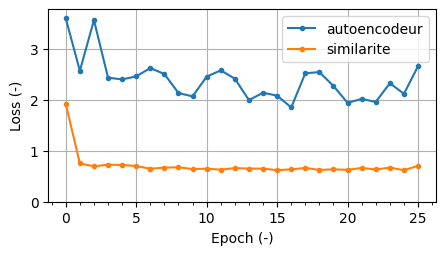

End of epoch 1
Total loss autoencodeur in epoch:  2.7660069465637207
Total loss similarite in epoch:  0.6470284271240234
Total loss sim (diff) in epoch:  0.7888762664794922
Total loss sim (same) in epoch:  0.32013477325439454


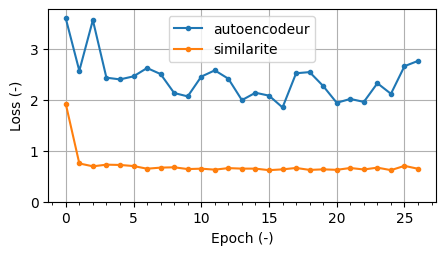

End of epoch 2
Total loss autoencodeur in epoch:  2.1135365962982178
Total loss similarite in epoch:  0.6129199600219727
Total loss sim (diff) in epoch:  0.5820959854125977
Total loss sim (same) in epoch:  0.2846120834350586


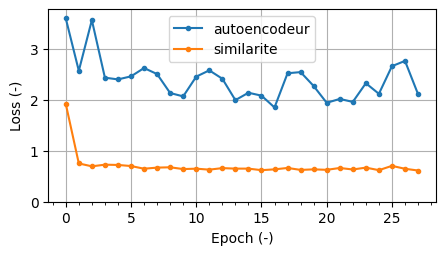

End of epoch 3
Total loss autoencodeur in epoch:  2.097832679748535
Total loss similarite in epoch:  0.6100316619873047
Total loss sim (diff) in epoch:  0.37975028991699217
Total loss sim (same) in epoch:  0.5030599212646485


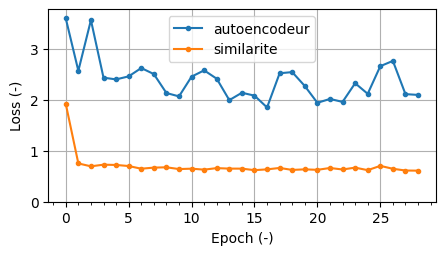

End of epoch 4
Total loss autoencodeur in epoch:  1.9478797912597656
Total loss similarite in epoch:  0.6894408416748047
Total loss sim (diff) in epoch:  0.3983854675292969
Total loss sim (same) in epoch:  0.3796080017089844


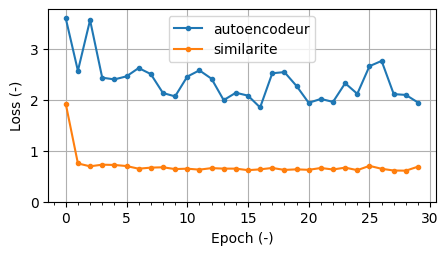

End of epoch 5
Total loss autoencodeur in epoch:  2.7034249305725098
Total loss similarite in epoch:  0.6345014953613282
Total loss sim (diff) in epoch:  0.3408357238769531
Total loss sim (same) in epoch:  0.6273225784301758


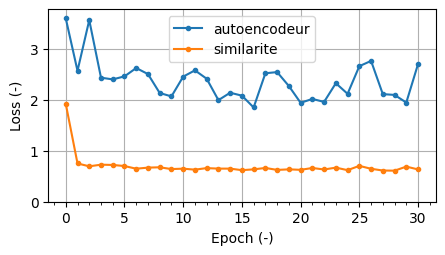

End of epoch 6
Total loss autoencodeur in epoch:  2.3394453525543213
Total loss similarite in epoch:  0.6615087127685547
Total loss sim (diff) in epoch:  0.5549386978149414
Total loss sim (same) in epoch:  0.2108384132385254


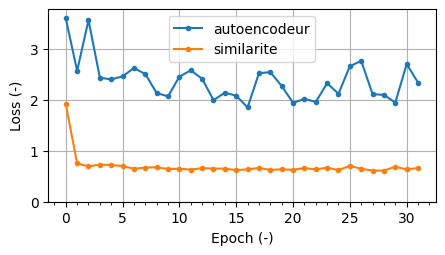

End of epoch 7
Total loss autoencodeur in epoch:  2.2507216930389404
Total loss similarite in epoch:  0.6413504028320313
Total loss sim (diff) in epoch:  0.48608062744140623
Total loss sim (same) in epoch:  0.41696041107177734


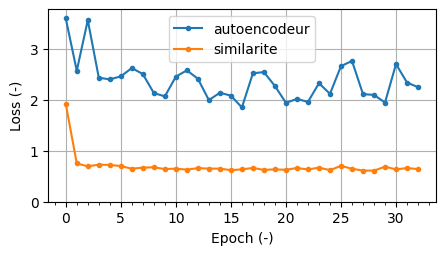

End of epoch 8
Total loss autoencodeur in epoch:  1.9244294166564941
Total loss similarite in epoch:  0.6525164031982422
Total loss sim (diff) in epoch:  0.5703389739990234
Total loss sim (same) in epoch:  0.22791265487670898


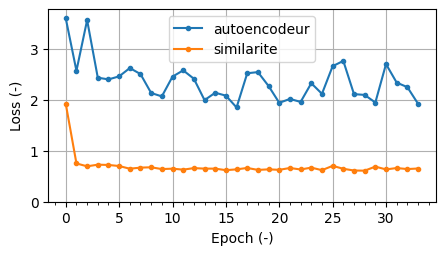

End of epoch 9
Total loss autoencodeur in epoch:  2.4271421432495117
Total loss similarite in epoch:  0.6222796630859375
Total loss sim (diff) in epoch:  0.35167617797851564
Total loss sim (same) in epoch:  0.5788478851318359


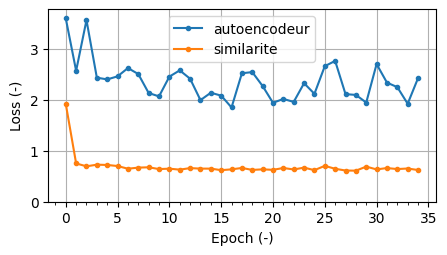

End of epoch 10
Total loss autoencodeur in epoch:  2.2220473289489746
Total loss similarite in epoch:  0.6522637176513671
Total loss sim (diff) in epoch:  0.4801971435546875
Total loss sim (same) in epoch:  0.3758262252807617


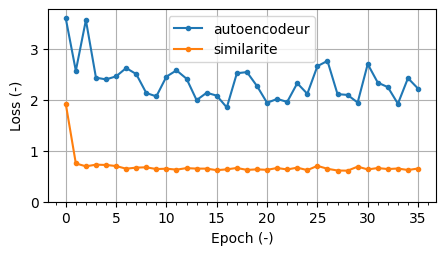

End of epoch 11
Total loss autoencodeur in epoch:  2.1535558700561523
Total loss similarite in epoch:  0.6361999130249023
Total loss sim (diff) in epoch:  0.5509687042236329
Total loss sim (same) in epoch:  0.3724040985107422


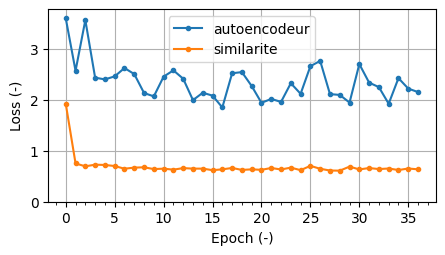

End of epoch 12
Total loss autoencodeur in epoch:  1.9826219081878662
Total loss similarite in epoch:  0.6295251083374024
Total loss sim (diff) in epoch:  0.5297628402709961
Total loss sim (same) in epoch:  0.40165565490722654


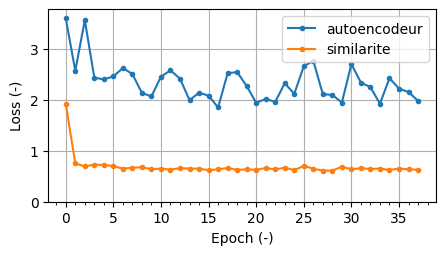

End of epoch 13
Total loss autoencodeur in epoch:  1.9841240644454956
Total loss similarite in epoch:  0.6171445846557617
Total loss sim (diff) in epoch:  0.3272258377075195
Total loss sim (same) in epoch:  0.49740192413330075


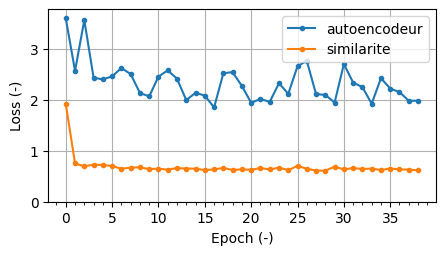

End of epoch 14
Total loss autoencodeur in epoch:  2.159134864807129
Total loss similarite in epoch:  0.6533200836181641
Total loss sim (diff) in epoch:  0.32180492401123045
Total loss sim (same) in epoch:  0.4679046630859375


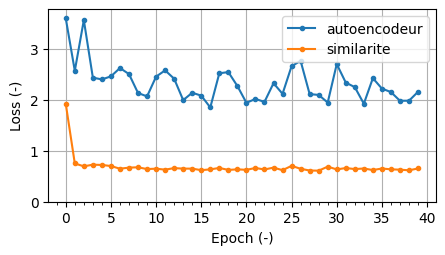

End of epoch 15
Total loss autoencodeur in epoch:  2.7116787433624268
Total loss similarite in epoch:  0.6238978576660156
Total loss sim (diff) in epoch:  0.4619428253173828
Total loss sim (same) in epoch:  0.3856907272338867


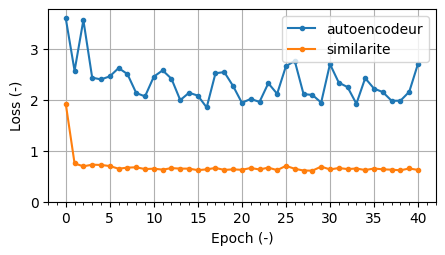

End of epoch 16
Total loss autoencodeur in epoch:  1.848512887954712
Total loss similarite in epoch:  0.6407633972167969
Total loss sim (diff) in epoch:  0.585521125793457
Total loss sim (same) in epoch:  0.27468746185302734


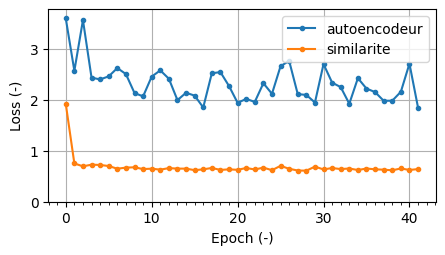

End of epoch 17
Total loss autoencodeur in epoch:  2.048064708709717
Total loss similarite in epoch:  0.6538433074951172
Total loss sim (diff) in epoch:  0.4804370880126953
Total loss sim (same) in epoch:  0.3637904357910156


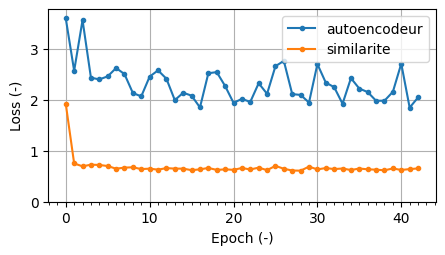

End of epoch 18
Total loss autoencodeur in epoch:  2.270293712615967
Total loss similarite in epoch:  0.6053796005249024
Total loss sim (diff) in epoch:  0.4889328765869141
Total loss sim (same) in epoch:  0.4474492645263672


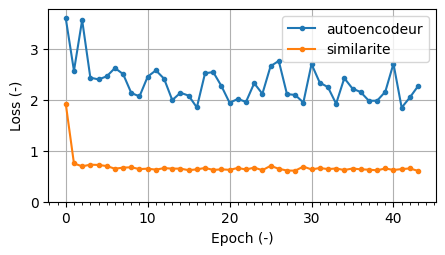

End of epoch 19
Total loss autoencodeur in epoch:  1.7500014305114746
Total loss similarite in epoch:  0.6246610641479492
Total loss sim (diff) in epoch:  0.5787527084350585
Total loss sim (same) in epoch:  0.30543472290039064


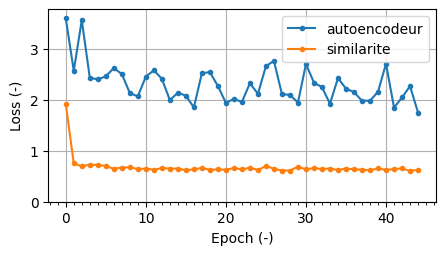

End of epoch 20
Total loss autoencodeur in epoch:  2.149928569793701
Total loss similarite in epoch:  0.6527251434326172
Total loss sim (diff) in epoch:  0.3751380157470703
Total loss sim (same) in epoch:  0.40345378875732424


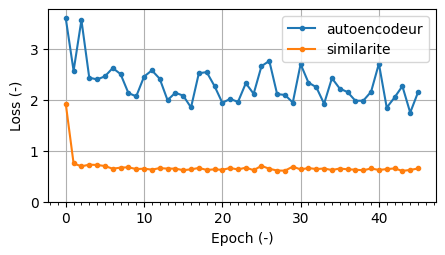

End of epoch 21
Total loss autoencodeur in epoch:  1.733042597770691
Total loss similarite in epoch:  0.6214232635498047
Total loss sim (diff) in epoch:  0.4556329345703125
Total loss sim (same) in epoch:  0.34463909149169925


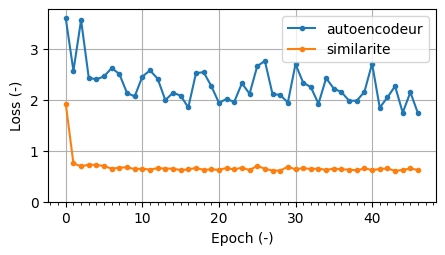

End of epoch 22
Total loss autoencodeur in epoch:  2.4708025455474854
Total loss similarite in epoch:  0.6458431243896484
Total loss sim (diff) in epoch:  0.31205446243286133
Total loss sim (same) in epoch:  0.687239990234375


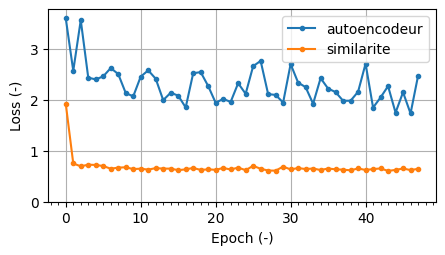

End of epoch 23
Total loss autoencodeur in epoch:  2.299345016479492
Total loss similarite in epoch:  0.6321723937988282
Total loss sim (diff) in epoch:  0.5705167388916016
Total loss sim (same) in epoch:  0.5265989303588867


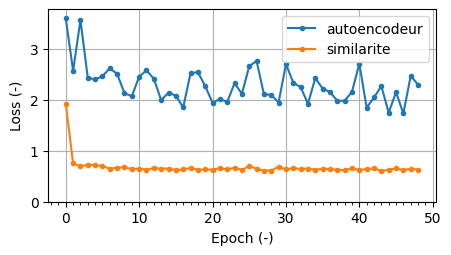

End of epoch 24
Total loss autoencodeur in epoch:  2.2238173484802246
Total loss similarite in epoch:  0.6123483276367188
Total loss sim (diff) in epoch:  0.5980756759643555
Total loss sim (same) in epoch:  0.3452459716796875


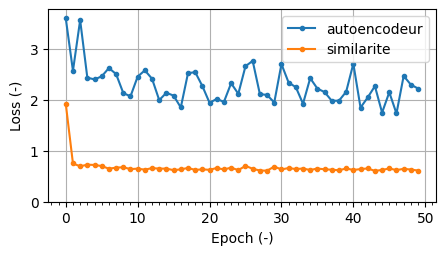

In [26]:

# data params
# root_directory = "normal_prep_datasets/dataset_chat_downscale/"
root_directory = "normal_prep_datasets/dataset_chat_downscale_no_background/"

required_train_imgs = 10
required_test_imgs = 1

num_epochs = 25
# batches_per_epoch = 8
batches_per_epoch = 64

batch_size = 32
# batch_size = 128

# learning_rate = 1e-5
# learning_rate = 1e-4
learning_rate = 1e-3
# learning_rate = 1e-2
# learning_rate = 1e-6

# ratio = [0.75, 0.25]
ratio = 0.5

model.train()




criterion_autoencodeur = nn.MSELoss()
criterion_ContrastiveLoss = ContrastiveLoss(margin = 15)



params = filter(lambda x: x.requires_grad, model.parameters())
optimizer = optim.Adam(params, lr = learning_rate)

# # Gossage sur les params potentiel
# momentum = 0.5
# optimizer = optim.SGD(params, lr = learning_rate, momentum = momentum)   





for epoch in range(num_epochs):

    (train_images, val_images, test_images, 
    train_labels , val_labels , test_labels , n_classes) = get_picture_tensors(root_directory=root_directory,
                                                                n_classes=n_classes, 
                                                                required_train_imgs=required_train_imgs, 
                                                                required_test_imgs=required_test_imgs,
                                                                use_selected_eval_datasets = False,
                                                                shuffle_directories = True,
                                                                shuffle_images = True, 
                                                                show_progress=False,
                                                                ordered_dataset=True)

    train_ordered_dataset = OrderedDataSet(train_images)
    train_siamese_dataset = SiameseDataset(train_ordered_dataset, ratio, batch_size = batch_size)
    train_dataloader = DataLoader(train_siamese_dataset, batch_size = batch_size, shuffle=True)


    total_loss_autoencodeur = 0
    total_loss_similarite = 0
    total_loss_similarite_0 = 0
    total_loss_similarite_1 = 0
    
    # n_label0 = 0
    # total_loss_label0 = 0
    # # n_label1 = 0
    # total_loss_label1 = 0
    
    for imgs_1, imgs_2, labels in train_dataloader:
        # # Entrainement de l'auto-encodeur
        optimizer.zero_grad()

        input_encoder = model.features(imgs_1)
        output_decoder = model(imgs_1)

        loss = criterion_autoencodeur(input_encoder, output_decoder) 

        total_loss_autoencodeur += loss.detach().numpy()

        loss.backward()
        optimizer.step()


        # # Entrainement sur ContrasticLoss
        optimizer.zero_grad()

        output1_encoder = model.encoder(imgs_1)
        output2_encoder = model.encoder(imgs_2)

        loss_label0 = criterion_ContrastiveLoss(output1_encoder[labels == False], output2_encoder[labels == False], labels[labels == False])
        loss_label1 = criterion_ContrastiveLoss(output1_encoder[labels == True], output2_encoder[labels == True], labels[labels == True])
        loss = criterion_ContrastiveLoss(output1_encoder, output2_encoder, labels)  # ContrastiveLoss

        total_loss_similarite += loss.detach().numpy() / 100
        total_loss_similarite_0 += loss_label0.detach().numpy() / 100
        total_loss_similarite_1 += loss_label1.detach().numpy() / 100

        loss.backward()
        optimizer.step()


    print(f"End of epoch {epoch}")
    print("Total loss autoencodeur in epoch: ", total_loss_autoencodeur)
    print("Total loss similarite in epoch: ", total_loss_similarite)
    print("Total loss sim (diff) in epoch: ", total_loss_similarite_0)
    print("Total loss sim (same) in epoch: ", total_loss_similarite_1)

    loss_at_each_epoch_autoencodeur.append(total_loss_autoencodeur)
    loss_at_each_epoch_similarite.append(total_loss_similarite)



    # maxtot = max([max(loss_at_each_epoch), max(loss_at_each_epoch_label0), max(loss_at_each_epoch_label1)])
    max_autoencodeur = max(loss_at_each_epoch_autoencodeur)
    max_similarite = max(loss_at_each_epoch_similarite)

    maxtot = max([max_autoencodeur, max_similarite])
    # maxtot = max(loss_at_each_epoch)

    from matplotlib.ticker import MultipleLocator

    fig, ax = plt.subplots(1, 1, figsize=(5, 2.5))

    ax.set_xlabel('Epoch (-)')
    # ax.set_ylabel('Validation accuracy (%)')
    ax.set_ylabel('Loss (-)')
    # ax.set_ylim(0, 100)
    # ax.set_ylim(0, 7500)
    ax.set_ylim(0, 1.05*maxtot)
    # ax.set_yticks(np.arange(0, 110, 10))
    ax.xaxis.set_minor_locator(MultipleLocator(1))

    ax.plot(loss_at_each_epoch_autoencodeur, '.-', label='autoencodeur')
    ax.plot(loss_at_each_epoch_similarite, '.-', label='similarite')
    # ax.plot(loss_at_each_epoch_label0, '.-', label='Diff cats')
    # ax.plot(loss_at_each_epoch_label1, '.-', label='Same cat')

    # ax.legend(loc='upper right')
    ax.legend(loc='best')

    plt.grid(True)
    plt.show()


In [15]:


based_model.save_parameters_to_file('alexnet_autoencodeur_9216_1028_128_3run.pth')


